In [4]:
import seaborn as sns # importujemy bibliotekę Seaborn
import pandas as pd #niezbędny do wczytania i odczytania pliku .csv
import numpy as np
import matplotlib.pyplot as plt #niezbędna biblioteka do zaczytywania wykresów

In [ ]:
# bins mówi nam o ilości słupków -zwykle się stosuje jak jest duzo opcji, żeby to zawęzić. Jak są dwie lub np. trzy opcji to tego bins się nie stosuje. ALe można też stosować na konkretna ilosc kolumn, np. jeśli mówimy o rozbiciu na miesiące, to wiadomo, że bierzemy 'bins=12', bo rok ma 12 miesięcy, lub np. czas odlotu na godziny w dobie, więc wiadomo, że bins=24, bo doba ma 24 h
# 'value_counts'=sortowanie,
# iloc[:20]=zawęzenie do np.20
#height=wysokosc,
# aspect=szerokosc

In [7]:
df_people = pd.read_csv('../../Pliki_CSV/02_seaborn/people.csv') #df_people jest naszym data frame = df, który dalej będzie używanmy jako źródlo danych, oczywiście w tym przypadku na bazie danych z pliku .csv
# df_people = pd.read_csv
df_people.head()

,Name,Age,Location,Occupation,Salary
0,Alice,28,New York,Engineer,80000
1,Bob,35,Los Angeles,Doctor,120000
2,Charlie,22,Chicago,Student,0
3,David,40,San Francisco,Manager,95000
4,Emily,29,Miami,Designer,75000


### WYKRES RELACYJNY

,Name,Age,Location,Occupation,Salary
0,Alice,28,New York,Engineer,80000
1,Bob,35,Los Angeles,Doctor,120000
2,Charlie,22,Chicago,Student,0
3,David,40,San Francisco,Manager,95000
4,Emily,29,Miami,Designer,75000


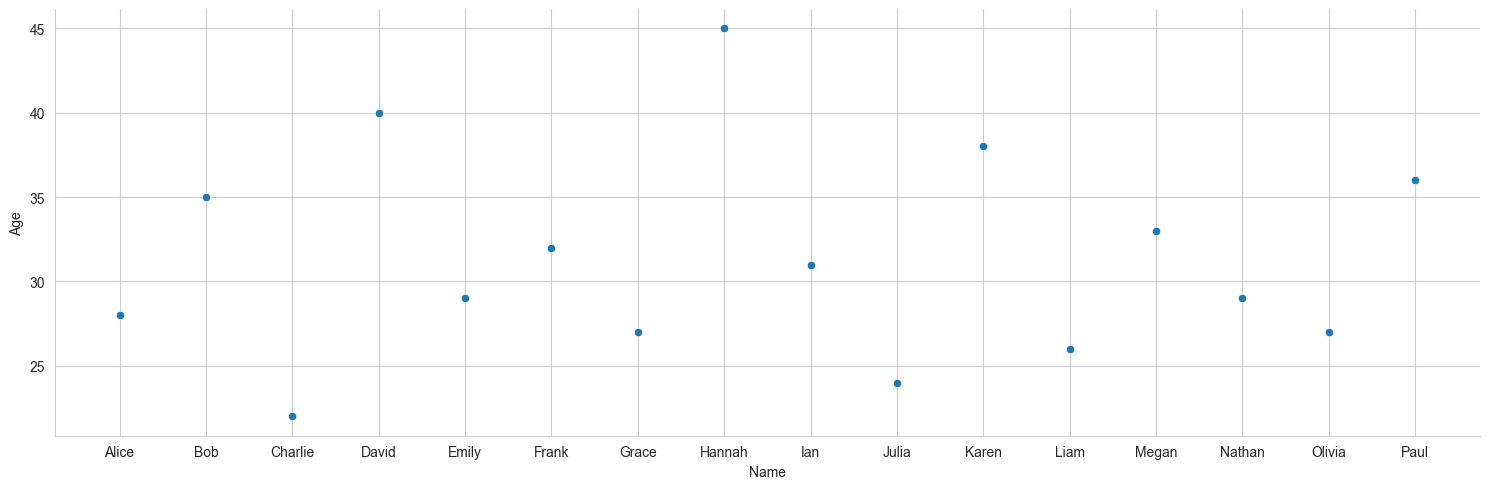

In [6]:
sns.relplot(df_people, x='Name', y = 'Age', height=5, aspect=3 ) # Wykres relacyjny za pomocą komendy 'relplot'. #height=wysokosc, aspect=szerokosc - te dwa parametry poszerzają wykres, jego widoczność na ekranie.
df_people.head() # wyswietlamy za pomocą 'head' kilka pierwszych wierszy

,Name,Age,Location,Occupation,Salary
0,Alice,28,New York,Engineer,80000
1,Bob,35,Los Angeles,Doctor,120000
2,Charlie,22,Chicago,Student,0
3,David,40,San Francisco,Manager,95000
4,Emily,29,Miami,Designer,75000


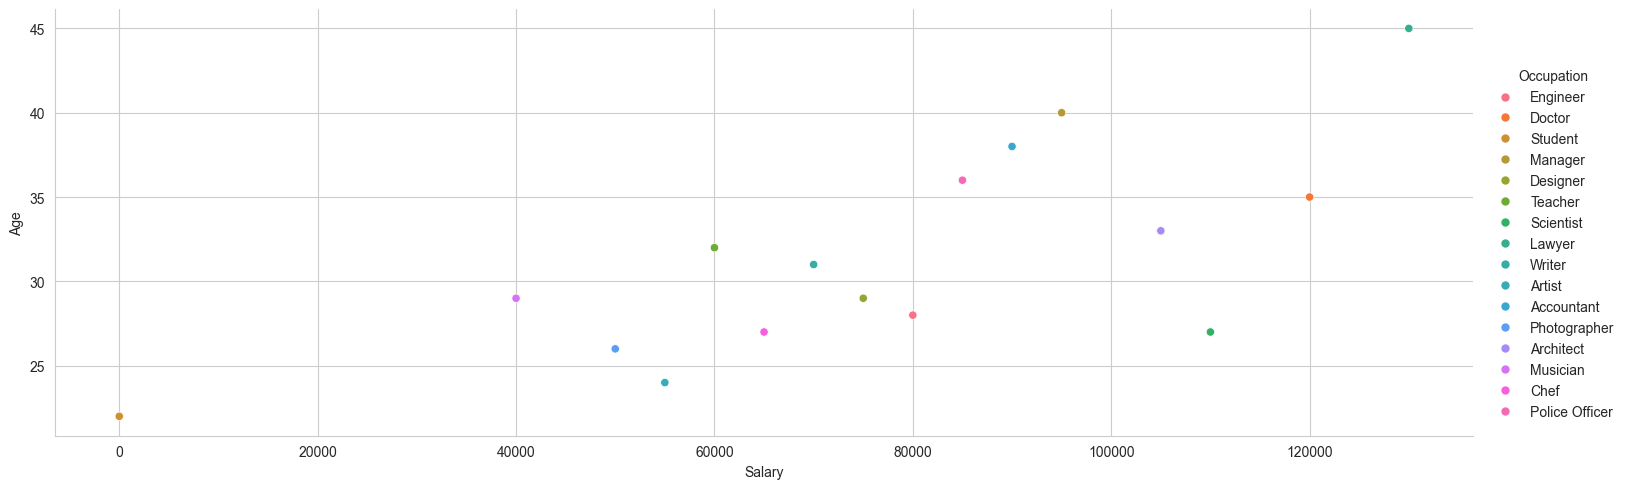

In [11]:
sns.relplot(df_people, x='Salary', y = 'Age', height=5, aspect=3, hue='Occupation' ) #Wykres relacyjny za pomocą komendy 'relplot'. #height=wysokosc, aspect=szerokosc - te dwa parametry poszerzają wykres, jego widoczność na ekranie.
 # 'hue' daje dodatkowe info + legendę
df_people.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1604\710140249.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_people['Salary'])


PermissionError: [Errno 13] Permission denied: 'save_as_a_pdf.pdf'

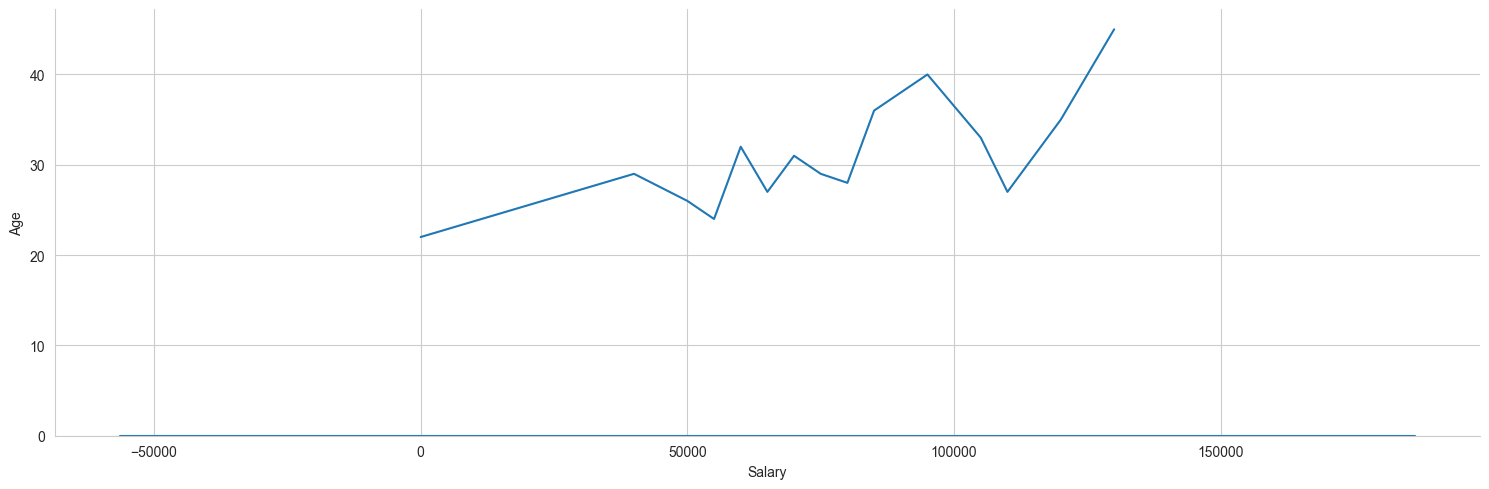

In [10]:
sns.relplot(df_people, x='Salary', y = 'Age', height=5, aspect=3, kind='line' ) #Wykres relacyjny liniowy za pomocą komendy 'relplot' + kind='line'.
df_people.head()

#Poniżej zaczytywanie wykresów do plików (.png i .pdf), które następnie mogą być dalej dystrybuowane, np. mailem, do zainteresowanej grupy osób.
sns.distplot(df_people['Salary'])
plt.savefig('save_as_a_png.png')
plt.savefig('save_as_a_pdf.pdf', dpi=300) #dpi to rozdzielczość
# Ścieżka do plików: C:\Users\Dell\PycharmProjects\PARTII_PawelWiltos_Python_Pandas_Seaborn\Kod\04_seaborn_WYKRESY_ZŁOŻONE_To_Jest_Czesc_Pythona
# filmik, który pokazuje jak to zrobić:
# https://www.google.com/search?q=how+to+save+plats+in+Seaborn+in+pdf&source=lmns&bih=781&biw=1539&hl=pl&sa=X&ved=2ahUKEwi385-9ldqCAxX6zQIHHe24BcEQ0pQJKAB6BAgBEAI#fpstate=ive&vld=cid:46c9bcd8,vid:lgpl3JwOA1c,st:0

### Wykres Dystrybucji

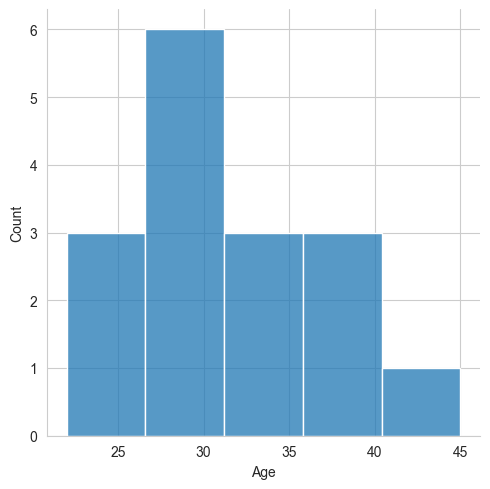

In [52]:
sns.displot(df_people, x='Age') #za pomocą komendy 'displot' tworzymy histogram dla kolumny z wiekiem

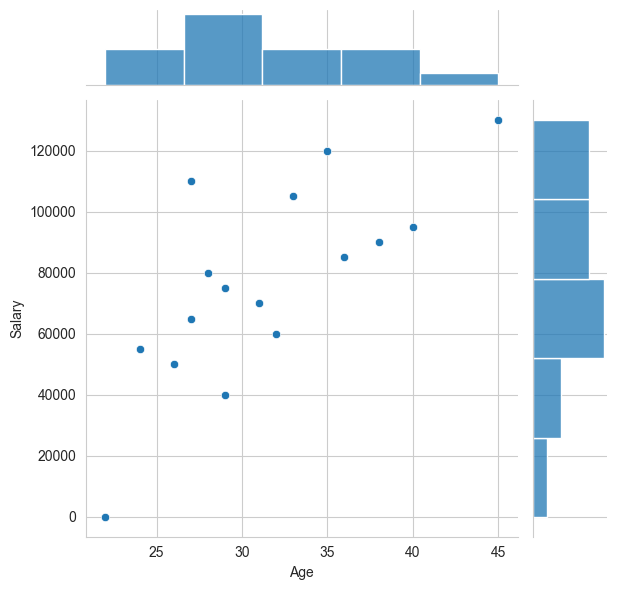

In [53]:
# Mix Wykresów typu: relacyjne + dystrybucji - Joinplot
# Joinplot = to wykres, który składa się z 3 różnych wykresów, gdzie w centralnym miejscu będzie wykres relacyjny, zaś u góry i po prawej będą histogramy kolumnowe (wykresy dystrybucji)
_ = sns.jointplot(df_people, x='Age', y='Salary')

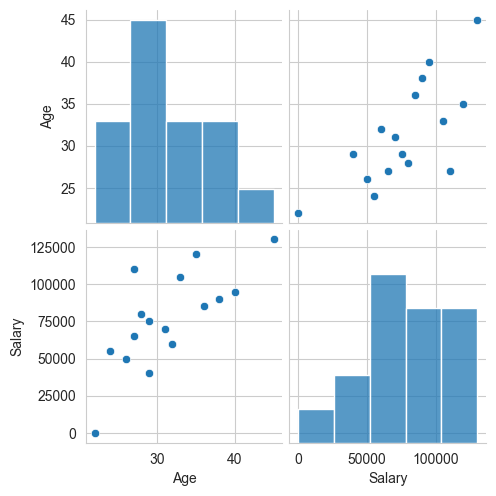

In [11]:
# A teraz cały zbiór powiązań danych numerycznych, które będą przedstawione na wykresach, za jednym zamachem
_ = sns.pairplot(df_people) # Robię to za pomocą komendy ' pairplot' i tu daje cały zbiór, który został nazwany jako tips


### Wykresy z kategoriami

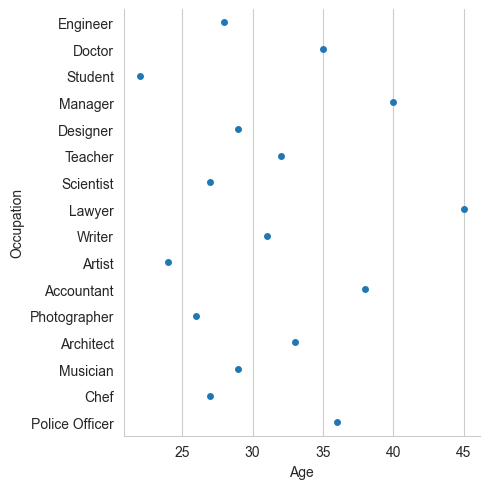

In [12]:
_ = sns.catplot(df_people, x='Age', y='Occupation') # jako kategorie obierzemy sobie wiek, i w zależności od wieku będziemy chcieli zobaczyć, jakie zawody są do nich przyporządkowane

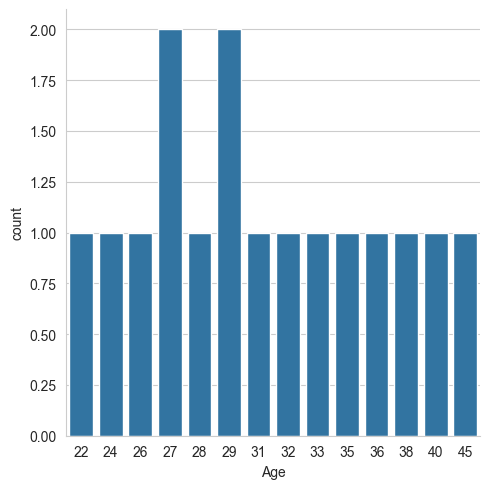

In [28]:
# Kolejny wykresy z kategoriami - Ilość wystąpien - Countplot - ten wykres po prostu zlicza liści wystąpień (os y), w stosunku do kategorii, u nas age (os x), np. pokazuje ze w czwartek było okolo 62 rachunków, w tym zbiorze danych 'tips'
_ = sns.catplot(df_people, x='Age', kind='count')

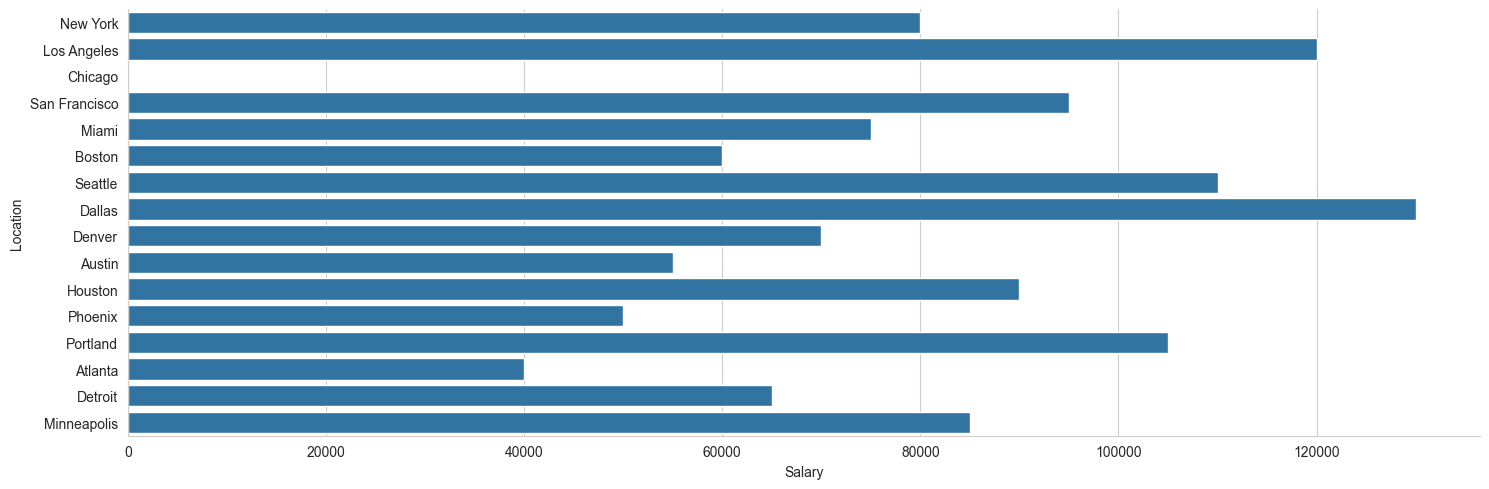

In [32]:
# Kolejny wykresy z kategoriami - WYKRES Słupkowy - BARchart, który pokazuje średnią dla danej kategorii, u nas to jest dla Location. Tu odwróciłem baze wykresu, z  pionowego, na poziomy + musiałem go poszerzyć.
_ = sns.catplot(df_people, x='Salary', y='Location', kind='bar', height=5, aspect=3)


### Wykresy regresji

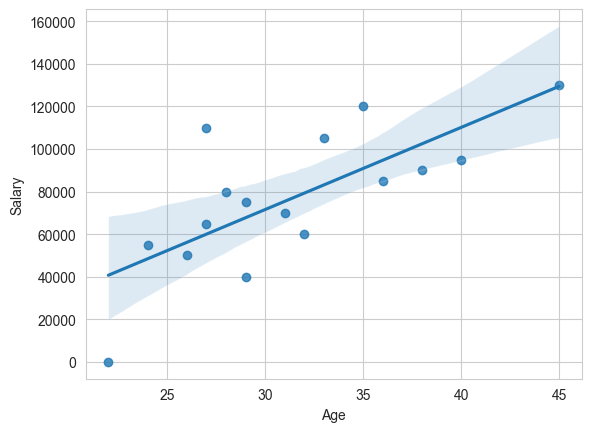

In [9]:
# wykres regresji, za pomocą komendy 'regplot'.
# Regresja to metoda statystyczna służąca określaniu związku pomiędzy różnymi wielkościami i przewidywaniu=predykcji nieznanych wartości jednych wielkości na podstawie znanych wartości innych.
# Ten wykres polega na pokazaniu wymaganych danych w postaci kropek (u nas to 'Salary' na osi y i 'Age' na osi x), a następnie na dopasowaniu linii do największego skupienia, a jednocześnie przewidywaniu=predykcji, na bazie tego zachowania jak się to będzie zachowywać później.
# Jak widać oprócz ciągłej linii, mamy również zacieniony obszar, ktory jakby poszerza możliwy zakres wystąpienia wartości. Im większy ten cień, tym wiekszy rozrzut i mniejsza powtarzalność, czyli predykcja prawdopodobnie będzie obarczona dużym błędem.
_ = sns.regplot(df_people,x='Age',y='Salary')